<a href="https://colab.research.google.com/github/camillaysm/analisis-non-parametrik-budidaya-udang/blob/main/Analisis_Nonparametrik_Budidaya_Udang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting g-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

cycles = pd.read_csv ('/content/drive/MyDrive/Dataset /Budidaya Ikan/cycles.csv')
farms =  pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/farms.csv')
fasting = pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/fasting.csv')
feeds = pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/feeds.csv')
harvests = pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/harvests.csv')
measurements = pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/measurements.csv')
ponds = pd.read_csv ('/content/drive/MyDrive/Dataset /Budidaya Ikan/ponds.csv')
samplings = pd.read_csv('/content/drive/MyDrive/Dataset /Budidaya Ikan/samplings.csv')

#DATA CLEANING AND PREPARATION

##Data Cycles

In [3]:
# CYCLES
# Change datatype 'started_at' and 'finished_at' into datetime
cycles['started_at'] = pd.to_datetime(cycles['started_at'])
cycles['finished_at'] = pd.to_datetime(cycles['finished_at'])
# Create column 'duration_days'
cycles['duration_days'] = (cycles['finished_at'] - cycles['started_at']).dt.days
# Drop column 'started_at', 'finished_at'
cycles = cycles.drop(['started_at', 'finished_at'], axis=1)
# Drop duplicates data
cycles = cycles.drop_duplicates()
cycles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             500 non-null    int64  
 1   pond_id        500 non-null    int64  
 2   total_seed     500 non-null    int64  
 3   area           500 non-null    float64
 4   duration_days  500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 23.4 KB


##Data Farms

In [4]:
# FARMS
# Drop duplicates
farms = farms.drop_duplicates()
# Drop NaN/Null
farms = farms.dropna()
# Drop column 'timezone'
farms = farms.drop('timezone', axis=1)
farms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        137 non-null    int64 
 1   province  137 non-null    object
 2   regency   137 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


##Data Fasting

In [5]:
# FASTING
# Drop duplicates
fasting = fasting.drop_duplicates()
# Drop NaN/Null
fasting = fasting.dropna()
# Drop column'logged_date'
fasting = fasting.drop('logged_date', axis=1)
fasting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6105 entries, 0 to 6188
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cycle_id  6105 non-null   int64  
 1   fasting   6105 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 143.1 KB


##Data Feeds

In [6]:
# FEEDS
# Drop duplicates
feeds = feeds.drop_duplicates()
# Drop NaN/Null
feeds = feeds.dropna()
# Drop columns'logged_date'
feeds = feeds.drop('logged_at', axis=1)
feeds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138781 entries, 0 to 143883
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cycle_id  138781 non-null  int64  
 1   quantity  138781 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.2 MB


##Data Harvests

In [7]:
# HARVESTS
# Drop duplicates
harvests = harvests.dropna()
# Drop column 'size', 'id', and 'harvested_at'
harvests = harvests.drop(['size', 'id', 'harvested_at'], axis=1)
harvests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 1869
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cycle_id  1821 non-null   int64  
 1   weight    1821 non-null   float64
 2   status    1821 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 56.9+ KB


##Data Ponds

In [8]:
# DATA PONDS
# Drop column 'length' dan 'width'
ponds = ponds.drop(['length', 'width'], axis=1)
# Drop NaN/Null
ponds = ponds.dropna()
ponds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 430
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       427 non-null    int64  
 1   farm_id  427 non-null    int64  
 2   deep     427 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB


##Data Sampling

In [9]:
# SAMPLINGS
# Drop duplikat
samplings = samplings.drop_duplicates()
# Drop kolom
samplings = samplings.drop(['sampled_at'], axis=1)
samplings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3532 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_id        3532 non-null   int64  
 1   average_weight  3532 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 82.8 KB


In [10]:
# Merge cycles with feeds
data = cycles.merge(feeds, left_on='id', right_on='cycle_id')
# Merge data with harvest
data = data.merge(harvests, on='cycle_id')
# Merge data with sampling
data = data.merge(samplings, on='cycle_id')

In [12]:
# Merge data with fasting
data = data.merge(fasting, on='cycle_id')

In [13]:
# Drop duplicates
data = data.drop_duplicates()

##Menghitung Performa Budidaya (SR, ADG, FCR)

In [14]:
# CALCULATE SR
data['SR'] = (data['weight'] / data['total_seed']) * 100

# CALCULATE ADG
# ADG is obtained by comparing and finding the difference in ABW between adjacent samplings and the time distance (days) between samplings
data['ADG'] = data['average_weight'].diff() / data['duration_days'].diff()

# CALCULATE FCR
# FCR is obtained by total feed divided by total weight of shirmp
data['total_feed'] = data.groupby('cycle_id')['quantity'].transform('sum')
data['total_weight'] = data.groupby('cycle_id')['weight'].transform('sum')
# FCR
data['FCR'] = data['total_feed'] / data['total_weight']

# Drop NaN on SR, FCR dan ADG
data = data.dropna(subset=['SR','FCR','ADG'])

In [15]:
# Merge farms with ponds
farms_ponds = farms.merge(ponds, left_on='id', right_on='farm_id', suffixes=('_farm', '_pond'))
# Merge farms_ponds with data
data = farms_ponds.merge(data, left_on='id_pond', right_on='pond_id')

# Drop useless columns
data = data.drop(['id_farm',
                  'id_pond',
                  'id',
                  'total_seed',
                  'quantity',
                  'weight',
                  'average_weight'], axis=1)
data.columns

Index(['province', 'regency', 'farm_id', 'deep', 'pond_id', 'area',
       'duration_days', 'cycle_id', 'status', 'fasting', 'SR', 'ADG',
       'total_feed', 'total_weight', 'FCR'],
      dtype='object')

In [16]:
data.duplicated().sum()

544196

In [17]:
data = data.drop_duplicates()

##Data Measurements

In [18]:
# MEASUREMENTS
# Calculate for water quality
# Calculate average temperature
measurements['avg_temp'] = (measurements['morning_temperature'] + measurements['evening_temperature']) / 2

# Calculate average dissolved oxygen (DO)
measurements['avg_do'] = (measurements['morning_do'] + measurements['evening_do']) / 2

# Calculate average salinity
measurements['avg_salinity'] = (measurements['morning_salinity'] + measurements['evening_salinity']) / 2

# Calculate average pH
measurements['avg_pH'] = (measurements['morning_pH'] + measurements['evening_pH']) / 2

# Calculate average of nutrient content
measurements['avg_nutrient'] = measurements[['ammonia', 'nitrate', 'nitrite']].mean(axis=1)

# Calculate average alkalinity and hardness parameters
measurements['avg_alkalinity_hardness'] = measurements[['alkalinity', 'hardness', 'calcium', 'magnesium', 'carbonate', 'bicarbonate']].mean(axis=1)

# Delete useless columns
measurements = measurements.drop(['pond_id', 'measured_date', 'morning_temperature',
       'evening_temperature', 'morning_do', 'evening_do', 'morning_salinity',
       'evening_salinity', 'morning_pH', 'evening_pH',
       'turbidity', 'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness',
       'calcium', 'magnesium', 'carbonate', 'bicarbonate'], axis=1)
measurements.columns

Index(['cycle_id', 'transparency', 'tom', 'total_plankton_', 'avg_temp',
       'avg_do', 'avg_salinity', 'avg_pH', 'avg_nutrient',
       'avg_alkalinity_hardness'],
      dtype='object')

In [19]:
measurements.head()

,cycle_id,transparency,tom,total_plankton_,avg_temp,avg_do,avg_salinity,avg_pH,avg_nutrient,avg_alkalinity_hardness
0,23531,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15493,NaN,NaN,NaN,28.9,NaN,15.0,NaN,NaN,NaN
2,15498,95.0,NaN,NaN,28.0,NaN,31.0,8.100,NaN,NaN
3,16294,40.0,175.0,NaN,26.2,14.95,13.0,NaN,1.313,1885.2
4,20429,NaN,NaN,NaN,29.9,NaN,NaN,8.575,NaN,NaN


In [20]:
# Fill NaN dengan 0
measurements = measurements.fillna(0)

# Delete row contains '0' in everey columns
measurements = measurements[~((measurements['transparency']==0) & (measurements['tom']==0)
                            & (measurements['avg_alkalinity_hardness']==0) & (measurements['avg_temp']==0)
                            & (measurements['avg_do']==0) & (measurements['avg_salinity']==0)
                            & (measurements['avg_pH']==0) & (measurements['avg_nutrient']==0)
                            & (measurements['total_plankton_']==0))]

# Merge data with measurements
data = data.merge(measurements, on='cycle_id')

# Drop duplicates
data = data.drop_duplicates()

In [21]:
data.head()

,province,regency,farm_id,deep,pond_id,area,duration_days,cycle_id,status,fasting,...,FCR,transparency,tom,total_plankton_,avg_temp,avg_do,avg_salinity,avg_pH,avg_nutrient,avg_alkalinity_hardness
0,JAWA TENGAH,PURWOREJO,3,1.0,33291,750.0,51,19808,Full,0.0,...,0.007376,0.0,0.0,0.0,28.541,5.4575,33.3690,0.00,0.0,0.0
1,JAWA TENGAH,PURWOREJO,3,1.0,33291,750.0,51,19808,Full,0.0,...,0.007376,0.0,0.0,0.0,28.526,5.5685,32.8695,0.00,0.0,0.0
2,JAWA TENGAH,PURWOREJO,3,1.0,33291,750.0,51,19808,Full,0.0,...,0.007376,0.0,0.0,0.0,28.785,5.4350,32.2000,8.58,0.0,0.0
3,JAWA TENGAH,PURWOREJO,3,1.0,33291,750.0,51,19808,Full,0.0,...,0.007376,0.0,0.0,0.0,28.307,5.2155,33.6615,0.00,0.0,0.0
4,JAWA TENGAH,PURWOREJO,3,1.0,33291,750.0,51,19808,Full,0.0,...,0.007376,0.0,0.0,0.0,27.200,5.3500,32.8550,8.10,0.0,0.0


##Finishing

In [22]:
# Mengidentifikasi jumlah nilai inf dan -inf
# SR
inf_count = np.isinf(data['SR']).sum()
neg_inf_count = np.isneginf(data['SR']).sum()
# FCR
inf_count = np.isinf(data['FCR']).sum()
neg_inf_count = np.isneginf(data['FCR']).sum()
# ADG
inf_count = np.isinf(data['ADG']).sum()
neg_inf_count = np.isneginf(data['ADG']).sum()

print(f'Jumlah nilai inf dalam SR: {inf_count}')
print(f'Jumlah nilai -inf dalam SR: {neg_inf_count}')
print(f'Jumlah nilai inf dalam FCR: {inf_count}')
print(f'Jumlah nilai -inf dalam FCR: {neg_inf_count}')
print(f'Jumlah nilai inf dalam ADG: {inf_count}')
print(f'Jumlah nilai -inf dalam ADG: {neg_inf_count}')

Jumlah nilai inf dalam SR: 135266
Jumlah nilai -inf dalam SR: 67633
Jumlah nilai inf dalam FCR: 135266
Jumlah nilai -inf dalam FCR: 67633
Jumlah nilai inf dalam ADG: 135266
Jumlah nilai -inf dalam ADG: 67633


In [23]:
# Mengganti nilai inf dan -inf dengan median dari data yang valid
# SR
median_value = data.replace([np.inf, -np.inf], np.nan)['SR'].median()
data['SR'] = data['SR'].replace([np.inf, -np.inf], median_value)
# FCR
median_value = data.replace([np.inf, -np.inf], np.nan)['FCR'].median()
data['FCR'] = data['FCR'].replace([np.inf, -np.inf], median_value)
# ADG
median_value = data.replace([np.inf, -np.inf], np.nan)['ADG'].median()
data['ADG'] = data['ADG'].replace([np.inf, -np.inf], median_value)

In [24]:
from scipy.stats import skew

# Menghitung skewness untuk kolom SR, FCR, ADG
skewness_sr = skew(data['SR'], nan_policy='omit')
skewness_fcr = skew(data['FCR'], nan_policy='omit')
skewness_adg = skew(data['ADG'], nan_policy='omit')

print(f'Skewness SR: {skewness_sr}')
print(f'Skewness FCR: {skewness_fcr}')
print(f'Skewness ADG: {skewness_adg}')

Skewness SR: 31.584243776039788
Skewness FCR: 2.894886248463946
Skewness ADG: 12.585469237501234


In [25]:
# Menggunakan log transformasi untuk mengurangi skewness
data['SR_log'] = np.log1p(data['SR'])
data['FCR_log'] = np.log1p(data['FCR'])
data['ADG_log'] = np.log1p(data['ADG'])

# Menghitung ulang skewness setelah transformasi
skewness_sr_log = skew(data['SR_log'], nan_policy='omit')
skewness_fcr_log = skew(data['FCR_log'], nan_policy='omit')
skewness_adg_log = skew(data['ADG_log'], nan_policy='omit')

print(f'Skewness SR (Log): {skewness_sr_log}')
print(f'Skewness FCR (Log): {skewness_fcr_log}')
print(f'Skewness ADG (Log): {skewness_adg_log}')

Skewness SR (Log): 4.978312971974694
Skewness FCR (Log): 2.609574270354391
Skewness ADG (Log): 3.4709226512613864


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151239 entries, 0 to 167106
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   province                 151239 non-null  object 
 1   regency                  151239 non-null  object 
 2   farm_id                  151239 non-null  int64  
 3   deep                     151239 non-null  float64
 4   pond_id                  151239 non-null  int64  
 5   area                     151239 non-null  float64
 6   duration_days            151239 non-null  int64  
 7   cycle_id                 151239 non-null  int64  
 8   status                   151239 non-null  object 
 9   fasting                  151239 non-null  float64
 10  SR                       151239 non-null  float64
 11  ADG                      151239 non-null  float64
 12  total_feed               151239 non-null  float64
 13  total_weight             151239 non-null  float64
 14  FCR      

In [27]:
data.duplicated().sum()

67733

In [28]:
data = data.drop_duplicates()

In [29]:
data = data.dropna()

#Uji Signifikansi Performa Budidaya terhadap Kolam, Tambak, dan Durasi Budidaya

Untuk melihat ada tidaknya perbedaan signifikan performa budidaya antara: Kolam, Tambak, dan Durasi Budidaya maka dilakukan uji non-parametrik Kruskal-Wallis.

Kruskal-Wallis digunakan saat data yang digunakan untuk variabel dependen bersifat ordinal, interval, atau rasio, tetapi tidak mengikuti distribusi normal. Selain itu Kruskal-Wallis digunakan untuk membandingkan lebih dari dua grup pada variabel independen (kolam, tambak, dan  durasi budidaya masing-masing memiliki lebih dari dua kelompok).

In [30]:
# data SR, FCR, dan ADG menunjukkan positif skewed (condong ke kanan) jadi pakai uji non-parametik
# (Kruskal-Wallis) jika p-value < 0.05, signifikan berbeda

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import kruskal

#uji kruskal-Wallis pada kolam (pond_id)
##mengelompokkan data berdasarkan id kolam
SR_pond = [group['SR_log'].values for name, group in data.groupby('pond_id')]
ADG_pond = [group['ADG_log'].values for name, group in data.groupby('pond_id')]
FCR_pond = [group['FCR_log'].values for name, group in data.groupby('pond_id')]

#uji Kruskal-Wallis untuk SR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk SR berdasarkan kolam:", kruskal(*SR_pond))
#uji Kruskal-Wallis untuk ADG berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk ADG berdasarkan kolam:", kruskal(*ADG_pond))
#uji Kruskal-Wallis untuk FCR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk FCR berdasarkan kolam:", kruskal(*FCR_pond))

#uji kruskal-Wallis pada tambak (farm_id)
##mengelompokkan data berdasarkan id tambak
SR_farm = [group['SR_log'].values for name, group in data.groupby('farm_id')]
ADG_farm = [group['ADG_log'].values for name, group in data.groupby('farm_id')]
FCR_farm = [group['FCR_log'].values for name, group in data.groupby('farm_id')]

#uji Kruskal-Wallis untuk SR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk SR berdasarkan tambak:", kruskal(*SR_farm))
#uji Kruskal-Wallis untuk ADG berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk ADG berdasarkan tambak:", kruskal(*ADG_farm))
#uji Kruskal-Wallis untuk FCR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk FCR berdasarkan tambak:", kruskal(*FCR_farm))

#uji kruskal-Wallis pada waktu budidaya (duration_days)
##mengelompokkan data berdasarkan duration_days
SR_days = [group['SR_log'].values for name, group in data.groupby('duration_days')]
ADG_days = [group['ADG_log'].values for name, group in data.groupby('duration_days')]
FCR_days = [group['FCR_log'].values for name, group in data.groupby('duration_days')]

#uji Kruskal-Wallis untuk SR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk SR berdasarkan waktu budidaya:", kruskal(*SR_days))
#uji Kruskal-Wallis untuk ADG berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk ADG berdasarkan waktu budidaya:", kruskal(*ADG_days))
#uji Kruskal-Wallis untuk FCR berdasarkan kolam
print("Hasil Uji Kruskal-Wallis untuk FCR berdasarkan waktu budidaya:", kruskal(*FCR_days))

Hasil Uji Kruskal-Wallis untuk SR berdasarkan kolam: KruskalResult(statistic=31869.0470207066, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk ADG berdasarkan kolam: KruskalResult(statistic=23673.032848814448, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk FCR berdasarkan kolam: KruskalResult(statistic=77959.24006576829, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk SR berdasarkan tambak: KruskalResult(statistic=26769.135470133326, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk ADG berdasarkan tambak: KruskalResult(statistic=14641.117397361711, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk FCR berdasarkan tambak: KruskalResult(statistic=59155.20874655121, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk SR berdasarkan waktu budidaya: KruskalResult(statistic=19340.28907938499, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk ADG berdasarkan waktu budidaya: KruskalResult(statistic=12143.55429819889, pvalue=0.0)
Hasil Uji Kruskal-Wallis untuk FCR berdasarkan waktu budidaya: KruskalResult(statistic=34537.60356453273, pv

Berdasarkan hasil Uji Kruskal-Wallis dimana seluruh pvalue < 0.05, didapati bahwa terdapat perbedaan yang signifikan dalam seluruh performa budidaya (SR, FCR, ADG) baik antar kolam, tambak, maupun waktu budidaya.


#Uji Korelasi Performa Budidaya dengan Kualitas Air

Uji korelasi ini dilakukan dengan menggunakan
Uji Korelasi Spearman (Spearman's rank correlation) yang merupakan metode non-parametrik untuk menilai kekuatan dan arah hubungan monotonic antara dua variabel.Hubungan monotonic adalah ketika salah satu variabel meningkat, variabel lainnya juga meningkat, atau ketika satu menurun, yang lain juga menurun. Namun, hubungan tidak harus linear seperti dalam uji Pearson.

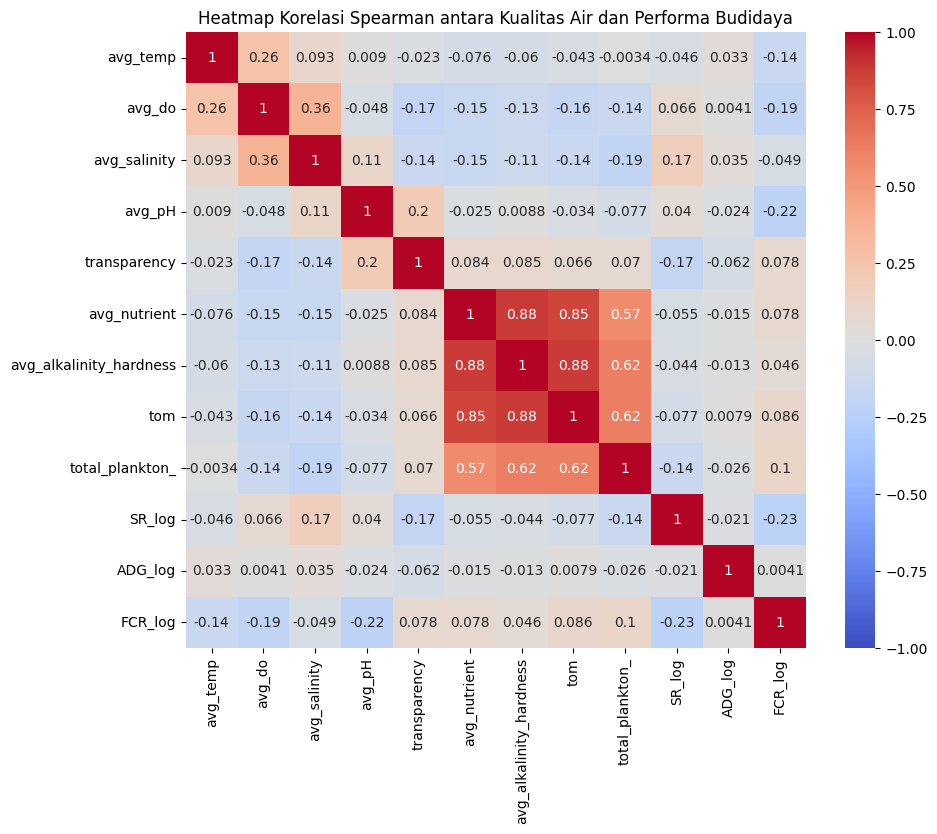

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

corr_matrix = data[['avg_temp', 'avg_do',
       'avg_salinity', 'avg_pH', 'transparency',
       'avg_nutrient', 'avg_alkalinity_hardness', 'tom', 'total_plankton_', 'SR_log', 'ADG_log', 'FCR_log']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Spearman antara Kualitas Air dan Performa Budidaya')
plt.show()

koefisien korelasi yang berkisar dari -1 hingga +1

*   Warna merah : korelasi positif kuat
*   Warna biru : korelasi negatif kuat
*   Warna putih : tidak ada korelasi/korelasi sangat lemah

Survival Rate :
— avg_do (Dissolved Oxygen): Korelasi positif lemah (0.066) menunjukkan bahwa ketika oksigen terlarut meningkat, maka akan meningkatkan Survival Rate (SR), namun efeknya tidak terlalu kuat.
— avg_salinity (Salinitas): Korelasi positif (0.17) menunjukkan hubungan positif yang sedikit lebih kuat dibandingkan avg_do. Artinya, salinitas yang lebih tinggi berkorelasi dengan Survival Rate yang lebih baik.
— Transparansi, pH, dan parameter lainnya menunjukkan korelasi yang sangat lemah dengan SR.

Average Daily Gain :
— avg_salinity: Korelasi positif kecil (0.035) menunjukkan hubungan yang lemah tetapi positif, di mana peningkatan salinitas sedikit berkorelasi dengan peningkatan ADG. Meskipun demikian, kekuatan korelasi ini sangat rendah.
— avg_do: Korelasi sangat rendah (0.0041) menunjukkan hubungan yang hampir netral antara oksigen terlarut dan ADG.
— Sebagian besar parameter kualitas air seperti pH, nutrient, dan transparansi menunjukkan korelasi yang sangat rendah

Feed Conversion Ratio :
— avg_temp (Suhu): Korelasi negatif (-0.14) menunjukkan bahwa suhu yang lebih tinggi cenderung berkorelasi dengan FCR yang lebih baik (nilai FCR yang lebih rendah berarti efisiensi konversi pakan yang lebih baik).
— avg_do: Korelasi sangat lemah (-0.19) menunjukkan bahwa peningkatan oksigen terlarut sedikit terkait dengan efisiensi pakan yang lebih baik.
— avg_pH: Korelasi negatif (-0.22) menunjukkan bahwa pH yang lebih rendah (atau lebih dekat ke tingkat asam) cenderung dikaitkan dengan FCR yang lebih rendah (lebih baik).

Hasil ini mengindikasikan bahwa meskipun kualitas air memiliki hubungan dengan performa budidaya, pengaruhnya tidak terlalu kuat untuk semua parameter.

#Analisis Klaster KMeans terhadap Kedalaman dan Luas Kolam

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

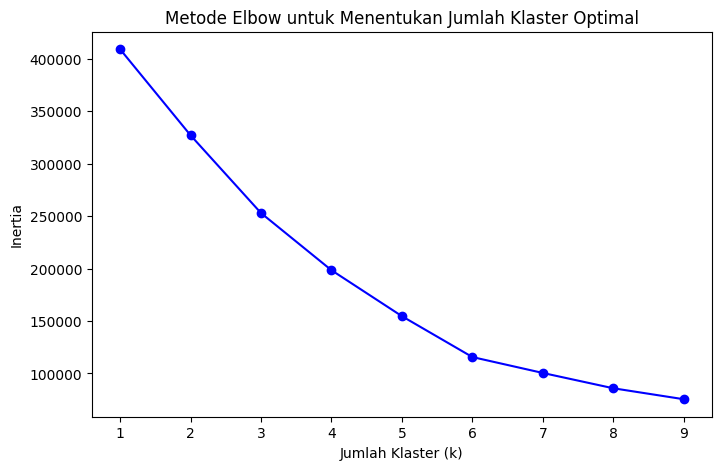

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalisasi
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[['area', 'deep', 'SR_log', 'FCR_log', 'ADG_log']])

# Mencari inertia untuk berbagai nilai k (Metode Elbow mencari nilai k)
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

Titik “elbow” yang paling jelas terlihat sekitar antara 4 & 5 klaster karena inersia mulai mengalami penurunan pada klaster 4 & 5. Berdasarkan grafik ini, jumlah klaster yang optimal adalah 4 atau 5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

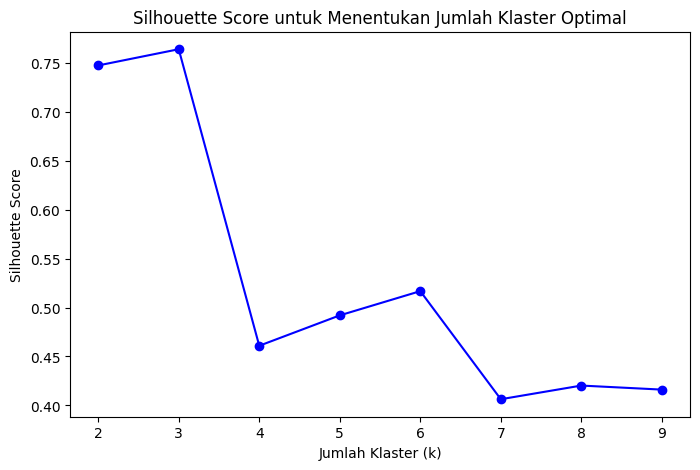

In [ ]:
from sklearn.metrics import silhouette_score

# Mencari Silhouette Score untuk berbagai nilai k
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_normalized)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_normalized, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.show()

Berbeda dengan hasil Silhoutte yang menunjukkan nilai tertinggi pada klaster 3. Berdasarkan grafik ini, jumlah klaster yang optimal adalah 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 area        deep    SR_log   ADG_log   FCR_log
cluster                                                        
0         1577.955303    1.368832  0.187637  0.005703  0.033159
1          968.038701  150.000000  0.129856  0.072113  0.030686
2        33961.661342    1.200000  0.155675  0.074241  0.019918


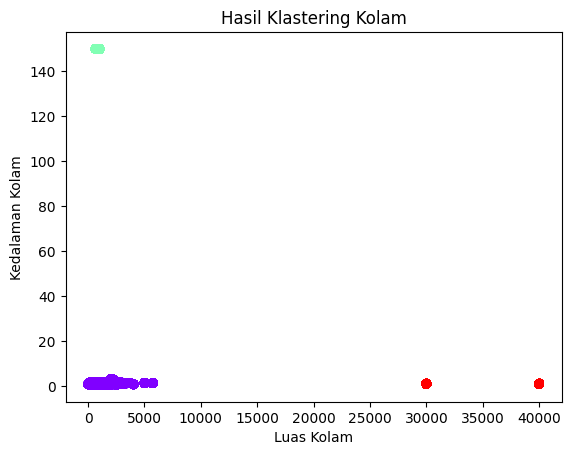

In [ ]:
# Analisis KMeans dengan 3 kluster
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data_normalized)

# Menampilkan karakteristik klaster
cluster_characteristics = data.groupby('cluster')[['area', 'deep', 'SR_log', 'ADG_log', 'FCR_log']].mean()
print(cluster_characteristics)


# Visualisasi hasil klastering
plt.scatter(data['area'], data['deep'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Luas Kolam')
plt.ylabel('Kedalaman Kolam')
plt.title('Hasil Klastering Kolam')
plt.show()

Cluster 0 memiliki area kolam yang relatif sedang (sekitar 1,577 m²) dan kedalaman yang moderat (1.37 m). Nilai SR dan ADG menunjukkan performa budidaya yang cukup baik, meskipun sedikit lebih tinggi dibanding cluster lain. Namun, FCR di cluster ini sedikit lebih tinggi, yang mungkin menunjukkan efisiensi pakan yang lebih rendah.

Cluster 1 memiliki area kolam yang paling kecil (968 m²) namun memiliki kedalaman yang sangat tinggi (150 m), yang mungkin menunjukkan data outlier atau kondisi kolam yang tidak biasa. Nilai SR dan ADG sedikit lebih rendah dibandingkan cluster lainnya, yang mungkin menunjukkan performa budidaya yang kurang optimal. FCR juga lebih rendah dibanding Cluster 0, yang bisa berarti efisiensi pakan sedikit lebih baik.

Cluster 2 memiliki area kolam yang sangat besar (33,961 m²) dengan kedalaman yang relatif dangkal (1.20 m). Nilai SR dan ADG menunjukkan performa budidaya yang baik, lebih tinggi dibandingkan cluster lainnya. FCR yang paling rendah di antara ketiga cluster menunjukkan efisiensi pakan yang sangat baik, yang berarti cluster ini mungkin memiliki kondisi budidaya yang optimal.

In [ ]:
silhouette_avg = silhouette_score(data_normalized, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.42750084636801705


#Uji Signifikansi Performa Budidaya terhadap Kebijakan Puasa dan Tidak Puasa

Melihat ada tidaknya perbedaan yang signifikan performa budidaya terhadap 'fasting' akan dilakukan dengan menggunakan uji Mann Whitney U. Uji Mann-Whitney U (atau sering disebut Wilcoxon rank-sum test) adalah metode non-parametrik yang digunakan untuk membandingkan dua kelompok independen ketika asumsi normalitas tidak terpenuhi dan ketika data diukur dalam skala ordinal (peringkat) atau interval.

In [32]:
data['fasting'].unique()

array([0., 1.])

In [ ]:
from scipy.stats import mannwhitneyu

# Membagi data berdasarkan status fasting
fasting = data[data['fasting'] == 1]
non_fasting = data[data['fasting'] == 0]

# Uji Mann-Whitney untuk SR
sr_stat, sr_p = mannwhitneyu(fasting['SR_log'], non_fasting['SR_log'])
print(f'Uji Mann-Whitney untuk SR: statistik={sr_stat}, p-value={sr_p}')

# Uji Mann-Whitney untuk FCR
fcr_stat, fcr_p = mannwhitneyu(fasting['FCR_log'], non_fasting['FCR_log'])
print(f'Uji Mann-Whitney untuk FCR: statistik={fcr_stat}, p-value={fcr_p}')

# Uji Mann-Whitney untuk ADG
adg_stat, adg_p = mannwhitneyu(fasting['ADG_log'], non_fasting['ADG_log'])
print(f'Uji Mann-Whitney untuk ADG: statistik={adg_stat}, p-value={adg_p}')

Uji Mann-Whitney untuk SR: statistik=909843515.0, p-value=2.7300758012941337e-108
Uji Mann-Whitney untuk FCR: statistik=829616380.0, p-value=0.09643226451371055
Uji Mann-Whitney untuk ADG: statistik=851209161.0, p-value=7.277073782429499e-13


Nilai p-value yang secara keseluruhan > 0.05 maka tidak ada perbedaan signifikan antara yang berpuasa ataupun tidak, sehingga tidak akan dilakukan analisis lanjutan.

#Analisis Performa Budidaya dengan Lokasi Tambak

In [ ]:
data['province'].value_counts()

province
JAWA TENGAH                  34403
JAWA BARAT                   14699
JAWA TIMUR                   14518
BALI                          6732
LAMPUNG                       3974
KEPULAUAN BANGKA BELITUNG     2642
SULAWESI TENGAH               1959
SULAWESI SELATAN              1155
SUMATERA BARAT                 651
ACEH                           546
NUSA TENGGARA BARAT            510
GORONTALO                       51
Name: count, dtype: int64

In [ ]:
data['regency'].value_counts()

regency
CILACAP           31362
CIREBON            8894
JEMBRANA           6690
SUBANG             5329
JEMBER             4477
PROBOLINGGO        3973
PESAWARAN          3899
BANGKA             2290
KENDAL             2170
DONGGALA           1959
NGANJUK            1680
LAMONGAN           1368
BARRU              1155
GRESIK              935
BANYUWANGI          703
AGAM                651
SUMENEP             605
PIDIE JAYA          546
SUMBAWA             510
PACITAN             452
PANGANDARAN         439
BANGKA SELATAN      352
PURWOREJO           343
SITUBONDO           325
JEPARA              312
PEMALANG            152
LAMPUNG BARAT        75
KEBUMEN              64
POHUWATO             51
BULELENG             42
GARUT                37
Name: count, dtype: int64

In [ ]:
#  Kruskal-Wallis untuk SR berdasarkan province
kruskal_sr_province = kruskal(*[group['SR_log'].values for name, group in data.groupby('province')])
print(f'Kruskal-Wallis untuk SR berdasarkan province: {kruskal_sr_province}')

#  Kruskal-Wallis untuk SR berdasarkan regency
kruskal_sr_regency = kruskal(*[group['SR_log'].values for name, group in data.groupby('regency')])
print(f'Kruskal-Wallis untuk SR berdasarkan regency: {kruskal_sr_regency}')

# Kruskal-Wallis untuk ADG berdasarkan province
kruskal_adg_province = kruskal(*[group['ADG_log'].values for name, group in data.groupby('province')])
print(f'Kruskal-Wallis untuk ADG berdasarkan province: {kruskal_adg_province}')

# Kruskal-Wallis untuk ADG berdasarkan regency
kruskal_adg_regency = kruskal(*[group['ADG_log'].values for name, group in data.groupby('regency')])
print(f'Kruskal-Wallis untuk ADG berdasarkan regency: {kruskal_adg_regency}')

# Kruskal-Wallis untuk FCR berdasarkan province
kruskal_fcr_province = kruskal(*[group['FCR_log'].values for name, group in data.groupby('province')])
print(f'Kruskal-Wallis untuk FCR berdasarkan province: {kruskal_fcr_province}')

# Kruskal-Wallis untuk FCR berdasarkan regency
kruskal_fcr_regency = kruskal(*[group['FCR_log'].values for name, group in data.groupby('regency')])
print(f'Kruskal-Wallis untuk FCR berdasarkan regency: {kruskal_fcr_regency}')

Kruskal-Wallis untuk SR berdasarkan province: KruskalResult(statistic=5148.554024935233, pvalue=0.0)
Kruskal-Wallis untuk SR berdasarkan regency: KruskalResult(statistic=10103.370669222544, pvalue=0.0)
Kruskal-Wallis untuk ADG berdasarkan province: KruskalResult(statistic=1593.8979992995703, pvalue=0.0)
Kruskal-Wallis untuk ADG berdasarkan regency: KruskalResult(statistic=4464.097185249734, pvalue=0.0)
Kruskal-Wallis untuk FCR berdasarkan province: KruskalResult(statistic=18785.64918708424, pvalue=0.0)
Kruskal-Wallis untuk FCR berdasarkan regency: KruskalResult(statistic=30080.3401506848, pvalue=0.0)


Seluruh performa budidaya memiliki perbedaan signifikan baik pada provinsi maupun kabupaten.

In [ ]:
# Menghitung rata-rata SR, FCR, dan ADG untuk setiap provinsi
average_province = data.groupby('province')[['SR_log', 'FCR_log', 'ADG_log']].mean()

# Menampilkan hasil
print(average_province)

                             SR_log   FCR_log   ADG_log
province                                               
ACEH                       0.245048  0.011136 -0.052331
BALI                       0.173236  0.019627  0.012847
GORONTALO                  0.276115  0.006158  0.336472
JAWA BARAT                 0.177537  0.024231  0.015840
JAWA TENGAH                0.174976  0.026155 -0.021316
JAWA TIMUR                 0.221022  0.051856  0.044206
KEPULAUAN BANGKA BELITUNG  0.165223  0.065847  0.156572
LAMPUNG                    0.204108  0.017697 -0.019884
NUSA TENGGARA BARAT        0.233834  0.058198 -0.047541
SULAWESI SELATAN           0.220716  0.065724  0.202835
SULAWESI TENGAH            0.136388  0.097984 -0.031083
SUMATERA BARAT             0.309345  0.013099 -0.112109


Provinsi dengan nilai SR mean paling tinggi adalah SUMATERA BARAT (0.309) yang mengindikasikan bahwa Sumatera Barat memiliki budidaya udang dengan taraf hidup yang paling tinggi, disusul dengan GORONTALO (0.276) dan ACEH (0.245). Sedangkan provinsi dengan taraf hidup udang yang paling rendah adalah provinsi Sulawesi Tengah (0.136).

Provinsi dengan nilai FCR mean paling rendah mengindikasikan bahwa pemberian pakan dalam budidaya udang dinilai efisien. Provinsi dengan mean paling rendah (efisien) adalah provinsi GORONTALO (0.006) disusul dengan ACEH (0.011) dan SUMATERA BARAT (0.013) dan yang paling tinggi (tidak efisien) adalah provinsi Sulawesi Tengah (0.979).

Provinsi dengan nilai ADG mean paling tinggi adalah provinsi GORONTALO (0.336) yang mengindikasikan bahwa pertumbuhan rerata berat udang harian paling baik terjadi di provinsi Gorontalo, disusul dengan SULAWESI SELATAN (0.202) dan KEP. BANGKA BELITUNG (0.156). Pertumbuhan rerata berat udang paling buruk terjadi di provinsi Sumatera Barat (-0.112).

In [ ]:
average_province_sorted = average_province.sort_values(by='ADG_log', ascending=False)
print(average_province_sorted)

                             SR_log   FCR_log   ADG_log
province                                               
GORONTALO                  0.276115  0.006158  0.336472
SULAWESI SELATAN           0.220716  0.065724  0.202835
KEPULAUAN BANGKA BELITUNG  0.165223  0.065847  0.156572
JAWA TIMUR                 0.221022  0.051856  0.044206
JAWA BARAT                 0.177537  0.024231  0.015840
BALI                       0.173236  0.019627  0.012847
LAMPUNG                    0.204108  0.017697 -0.019884
JAWA TENGAH                0.174976  0.026155 -0.021316
SULAWESI TENGAH            0.136388  0.097984 -0.031083
NUSA TENGGARA BARAT        0.233834  0.058198 -0.047541
ACEH                       0.245048  0.011136 -0.052331
SUMATERA BARAT             0.309345  0.013099 -0.112109


In [ ]:
# Menghitung rata-rata SR, FCR, dan ADG untuk setiap kabupaten
average_regency = data.groupby('regency')[['SR_log', 'FCR_log', 'ADG_log']].mean()

# Menampilkan hasil rata-rata dari yang paling tinggi
print(average_regency)

                  SR_log   FCR_log   ADG_log
regency                                     
AGAM            0.309345  0.013099 -0.112109
BANGKA          0.157062  0.071055  0.128240
BANGKA SELATAN  0.218316  0.031964  0.340889
BANYUWANGI      0.231510  0.018302  0.217636
BARRU           0.220716  0.065724  0.202835
BULELENG        0.261739  0.038907  0.101265
CILACAP         0.174940  0.025894 -0.024641
CIREBON         0.163264  0.025349  0.059695
DONGGALA        0.136388  0.097984 -0.031083
GARUT           0.154373  0.072636  0.096858
GRESIK          0.353198  0.012538 -0.029975
JEMBER          0.205776  0.044750  0.107509
JEMBRANA        0.172680  0.019506  0.012292
JEPARA          0.332005  0.018592  0.208181
KEBUMEN         0.336472  0.005153  0.176751
KENDAL          0.130886  0.033612 -0.033954
LAMONGAN        0.129662  0.069354 -0.087621
LAMPUNG BARAT   0.058295  0.032177  0.082356
NGANJUK         0.151086  0.094054  0.006715
PACITAN         0.274233  0.030996 -0.010142
PANGANDARA

Kabupaten GRESIK memiliki SR mean tertinggi (0.353), yang menunjukkan tingkat kelangsungan hidup udang yang relatif lebih tinggi dibandingkan kabupaten lain. Kabupaten KEBUMEN (0.336) dan JEPARA (0.332) juga memiliki SR yang tinggi. Sedangkan yang paling rendah adalah Lampung Barat (0.058).

Kabupaten KEBUMEN memiliki FCR mean terendah (0.005), yang menunjukkan efisiensi pakan yang lebih baik disusul dengan Kabupaten POHUWATO (0.006) dan PANGANDARAN (0.010). FCR mean paling tinggi (tidak efisien) terlihat di kabupaten Donggala (0.097).

Kabupaten BANGKA SELATAN memiliki ADG mean tertinggi (0.340), yang berarti pertumbuhan udang harian yang relatif cepat terjadi di kabupaten tersebut, disusul dengan Kabupaten POHUWATO (0.336) dan BANYUWANGI (0.217). ADG mean paling rendah terlihat di kabupaten Agam (-0.112).

In [ ]:
average_regency_sorted = average_regency.sort_values(by='SR_log', ascending=False)
print(average_regency_sorted)

                  SR_log   FCR_log   ADG_log
regency                                     
GRESIK          0.353198  0.012538 -0.029975
KEBUMEN         0.336472  0.005153  0.176751
JEPARA          0.332005  0.018592  0.208181
AGAM            0.309345  0.013099 -0.112109
POHUWATO        0.276115  0.006158  0.336472
PACITAN         0.274233  0.030996 -0.010142
BULELENG        0.261739  0.038907  0.101265
PROBOLINGGO     0.257313  0.057431  0.039813
PURWOREJO       0.255809  0.018534  0.076983
PANGANDARAN     0.251992  0.010798 -0.073580
PIDIE JAYA      0.245048  0.011136 -0.052331
SUMENEP         0.240962  0.023074 -0.038537
PEMALANG        0.239198  0.015185  0.068852
SUMBAWA         0.233834  0.058198 -0.047541
BANYUWANGI      0.231510  0.018302  0.217636
BARRU           0.220716  0.065724  0.202835
SITUBONDO       0.219374  0.058115  0.042480
BANGKA SELATAN  0.218316  0.031964  0.340889
PESAWARAN       0.206913  0.017419 -0.021851
JEMBER          0.205776  0.044750  0.107509
SUBANG    

#Analisis Performa Budidaya terhadap Durasi Budidaya

Durasi budidaya merupakan lamanya waktu yang dihabiskan untuk membudidayakan udang, dari tahap awal (penebaran bibit) hingga panen. Data pada kolom ‘duration_days’ akan dibagi kedalam 3 (tiga) kategori yakni durasi Pendek, Sedang, dan Panjang dengan berpatokan pada kuartil. Pembagian kategori akan dianalisis untuk melihat apakah pada setiap kategori memiliki perbedaan yang signifikan?manakah durasi paling baik untuk masing-masing performa budidaya (SR, ADG, FCR)?. Analisis untuk durasi budidaya ini akan dilakukan dengan Uji Kruskal-Wallis.

In [33]:
data.duration_days.unique()

array([ 51,  98,  85,  22,  35,  80,  70,  96,  87,  94,  71,  86,  64,
        65,  67, 104, 100, 103,  90,  56, 135, 131,  93,  74,  59,  61,
        75,  52,  69, 116, 113, 120,  99,  60,  66, 111, 101,  83,  84,
       102,  91,  42,  92, 124,  78,  68,  88,  63,  55,  76,  72,  58,
        62,  57,  53,  54,  48,  44, 118, 125,  79,  37, 108,  97,  77,
        43, 123, 110, 117, 114,  73, 150,  89,  82,  95,  81, 126,  46,
        36, 220])

In [34]:
# Menghitung kuartil 'duration_days'
Q1 = data['duration_days'].quantile(0.25)
Q3 = data['duration_days'].quantile(0.75)

# Mengkategorikan durasi hari menjadi 3 kategori: Pendek, Sedang, Panjang
durasi_kategori = pd.cut(data['duration_days'], bins=[data['duration_days'].min(), Q1, Q3, data['duration_days'].max()], labels=['Pendek', 'Sedang', 'Panjang'])

# Menampilkan hasil
print(durasi_kategori)

0         Pendek
1         Pendek
2         Pendek
3         Pendek
4         Pendek
           ...  
167008    Pendek
167009    Pendek
167010    Pendek
167011    Pendek
167012    Pendek
Name: duration_days, Length: 81840, dtype: category
Categories (3, object): ['Pendek' < 'Sedang' < 'Panjang']


In [35]:
data['durasi_kategori'] = durasi_kategori

# Deskriptif Statistik
durasi_stats = data.groupby('durasi_kategori')[['SR_log', 'FCR_log', 'ADG_log']].mean()
print(durasi_stats)

                   SR_log   FCR_log   ADG_log
durasi_kategori                              
Pendek           0.175124  0.032074  0.035940
Sedang           0.140355  0.035093  0.023297
Panjang          0.297511  0.029428 -0.057987


<ipython-input-35-5fcb192bd856>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durasi_stats = data.groupby('durasi_kategori')[['SR_log', 'FCR_log', 'ADG_log']].mean()


In [36]:
# Kruskal-Wallis SR
kruskal_result_sr = kruskal(data['SR_log'][durasi_kategori == 'Pendek'],
                            data['SR_log'][durasi_kategori == 'Sedang'],
                            data['SR_log'][durasi_kategori == 'Panjang'])
print('Kruskal-Wallis SR:', kruskal_result_sr)

# Kruskal-Wallis ADG
kruskal_result_adg = kruskal(data['ADG_log'][durasi_kategori == 'Pendek'],
                            data['ADG_log'][durasi_kategori == 'Sedang'],
                            data['ADG_log'][durasi_kategori == 'Panjang'])
print('Kruskal-Wallis ADG:', kruskal_result_adg)

# Kruskal-Wallis FCR
kruskal_result_fcr = kruskal(data['FCR_log'][durasi_kategori == 'Pendek'],
                            data['FCR_log'][durasi_kategori == 'Sedang'],
                            data['FCR_log'][durasi_kategori == 'Panjang'])
print('Kruskal-Wallis FCR:', kruskal_result_fcr)

Kruskal-Wallis SR: KruskalResult(statistic=7305.891711675989, pvalue=0.0)
Kruskal-Wallis ADG: KruskalResult(statistic=3805.9918203911816, pvalue=0.0)
Kruskal-Wallis FCR: KruskalResult(statistic=551.8153716912665, pvalue=1.4955967837626634e-120)


pvalue menunjukkan nilai dibawah 0.05 sehingga terdapat perbedaan signifikan tiap kategori duriasi terhadap performa budidaya.

In [ ]:
data['durasi_kategori'].value_counts()

durasi_kategori
Sedang     41024
Pendek     21620
Panjang    19154
Name: count, dtype: int64